# Sprawozdanie z Metod Inteligencji Obliczeniowej

## Małgorzata Makieła
### 24.03.2024








## Zadanie 1
Dane z pliku Advertising.csv wczytałam za pomocą funkcji z pakietu pandas *read_csv()* i podzieliłam na zbiory X (dane z kolumn 'TV', 'Radio' i 'Newspaper') i Y (dane z kolumny 'Sales'). Dane podzieliłam na zbiory treningowe i testowe w proporcji 80:20. Użyłam modelu MLPRegressor() do analizy danych.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Advertising.csv")
X = data[['TV', 'Radio', 'Newspaper']]
Y = data['Sales']

# normalizacja danych wejściowych
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# podział na zbiór trenujący i testowy w proporcji 80:20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# trenowanie modelu

hidden_layers = [(20, 20), (50, 50, 50), (80, 80, 80, 80)]
activations = ['relu', 'tanh']

for hidden_layer in hidden_layers:
    for activation in activations:
        network = MLPRegressor(hidden_layer_sizes=hidden_layer, activation=activation, max_iter=20000)
        network.fit(X_train, y_train)
        y_pred = network.predict(X_test)

        print(f"Results for: hidden_layer_sizes = {hidden_layer}, activation = {activation}")
        print("score: ", round(network.score(X_test, y_test), 3))
        print("mse: ", round(mean_squared_error(y_test, y_pred), 3), "\n")



Results for: hidden_layer_sizes = (20, 20), activation = relu
score:  0.973
mse:  0.529 

Results for: hidden_layer_sizes = (20, 20), activation = tanh
score:  0.986
mse:  0.281 

Results for: hidden_layer_sizes = (50, 50, 50), activation = relu
score:  0.501
mse:  9.894 

Results for: hidden_layer_sizes = (50, 50, 50), activation = tanh
score:  0.99
mse:  0.2 

Results for: hidden_layer_sizes = (80, 80, 80, 80), activation = relu
score:  0.594
mse:  8.053 

Results for: hidden_layer_sizes = (80, 80, 80, 80), activation = tanh
score:  0.992
mse:  0.156 



### Wnioski
Dokładność klasyfikacji obliczona z użyciem funkcji *score()* jest bardzo wysoka dla wszystkich wyjść dla których użyta została funkcja aktywacji 'tanh', jednak wartość błędu średniokwadratowego zmienia się. Jest widoczna różnica między MSE dla sieci o większej ilości neuronów a dla tej o ich mniejszej ilości przy funkcji aktywacji 'tanh'. Dla 'relu' MSE wychodzi bardzo różne - potrafi wyjść małe, rzędu 0.2-0.3, jednak zdecydowanie częściej jest rzędu 10.0, co może być spowodowane przeuczeniem sieci albo samą charakterystyką tej funkcji. A więc dla tego zbioru danych najlepiej poradziła sobie funkcja aktywacji 'tanh' przy rozmiarze warstw i ilości neuronów równej (80, 80, 80, 80). Dla jeszcze większych sieci wyniki często dochodziło do przeuczenia modelu co skutkowało gorszym wynikiem dla zbioru testującego, stąd pozostałam na 4 warstwach po 80 neuronów.

## Zadanie 2.



train score:  0.8512916379064216
test score:  0.8434667087494713


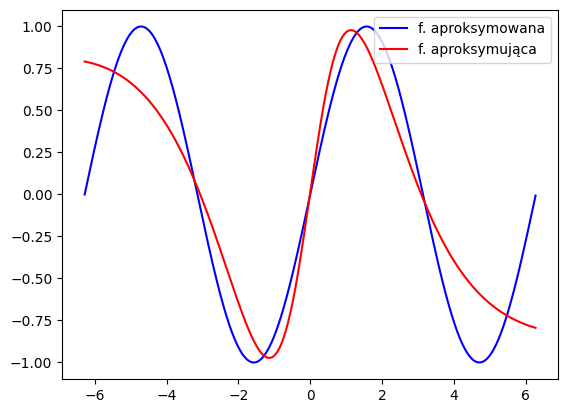

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

X = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
Y = np.sin(X)

X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(-1, 1), Y, test_size=0.2)
network = MLPRegressor(hidden_layer_sizes=(30), max_iter=20000, activation='tanh')
network.fit(X_train, Y_train)
y_pred = network.predict(X.reshape(-1, 1))

print("train score: ", network.score(X_train, Y_train))
print("test score: ", network.score(X_test, Y_test))

plt.plot(X, Y, 'b', label="f. aproksymowana")
plt.plot(X, y_pred, 'r', label="f. aproksymująca")
plt.legend(loc='upper right')
plt.show()

Wzór funkcji aproksymującej z użyciem wag (coefs_) i biasów (intercepts_)

In [6]:
print("y = ")
for index in range(30):
    print(f"{network.coefs_[0][0][index]:.2f}*tanh({network.coefs_[1][index][0]:.2f}x + {network.intercepts_[0][index]:.2f}) + ")


y = 
-0.04*tanh(0.03x + 0.02) + 
-0.00*tanh(0.00x + -0.16) + 
-0.19*tanh(0.12x + 0.12) + 
-0.10*tanh(-0.11x + 0.15) + 
0.25*tanh(0.05x + -0.08) + 
0.00*tanh(-0.00x + -0.22) + 
0.32*tanh(0.06x + 0.17) + 
-0.01*tanh(0.07x + 0.27) + 
-0.06*tanh(0.08x + -0.05) + 
0.01*tanh(0.17x + -0.08) + 
0.25*tanh(0.09x + 0.05) + 
0.13*tanh(-0.05x + 0.26) + 
-0.15*tanh(-0.12x + -0.01) + 
0.00*tanh(-0.00x + -0.23) + 
-0.13*tanh(0.10x + 0.14) + 
-0.01*tanh(-0.00x + -0.21) + 
-0.00*tanh(0.00x + -0.23) + 
0.30*tanh(-0.08x + 0.23) + 
0.02*tanh(-0.00x + -0.03) + 
-0.09*tanh(0.09x + 0.25) + 
0.05*tanh(-0.12x + 0.11) + 
0.19*tanh(0.12x + 0.14) + 
0.26*tanh(-0.23x + 0.14) + 
0.06*tanh(0.04x + -0.20) + 
0.00*tanh(-0.00x + -0.17) + 
-0.06*tanh(0.00x + 0.16) + 
-0.00*tanh(0.00x + -0.24) + 
0.19*tanh(-0.02x + -0.20) + 
-0.00*tanh(0.04x + -0.08) + 
0.06*tanh(0.02x + -0.10) + 


### Wnioski

Model z jedną warstwą ukrytą radzi sobie nieźle, dla większej ilości neuronów niż 30 wyniki już się wiele nie poprawiały. Dla dwóch warstw ukrytych za to, o rozmiarach np (50, 50), wynik był dużo wyższy, i funkcje prawie w całości się na siebie nakładały.



## Zadanie 3.

Załadowałam zbiór 'california housing' z użyciem funkcji *fetch_california_housing(return_X_y=True)*, co od razu podzieliło ten zbiór na X i Y, po czym znormalizowałam dane wejściowe. Wytrenowałam kilka modeli żeby zobaczyć, który poradzi sobie najlepiej. Warstwy ukryte wykorzystałam takie: (20, 20), (50, 50, 50), (80, 80, 80, 80), (100, 100, 100, 100, 100), a dla każdej z nich sprawdziłam wynik dla funkcji aktywacji 'relu' i 'tanh'.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

X, Y = fetch_california_housing(return_X_y=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

hidden_layers = [(20, 20), (50, 50, 50), (80, 80, 80, 80), (100, 100, 100, 100, 100)]
activations = ['relu', 'tanh']

for hidden_layer in hidden_layers:
    for activation in activations:
        network = MLPRegressor(hidden_layer_sizes=hidden_layer, activation=activation, max_iter=20000, solver='adam')
        network.fit(X_train, Y_train)
        y_pred = network.predict(X_test)

        print(f"Results for: hidden_layer_sizes = {hidden_layer}, activation = {activation}")
        print("score: ", round(network.score(X_test, Y_test), 3))
        print("mse: ", round(mean_squared_error(Y_test, y_pred), 3), "\n")



Results for: hidden_layer_sizes = (20, 20), activation = relu
score:  0.769
mse:  0.314 

Results for: hidden_layer_sizes = (20, 20), activation = tanh
score:  0.748
mse:  0.342 

Results for: hidden_layer_sizes = (50, 50, 50), activation = relu
score:  0.797
mse:  0.276 

Results for: hidden_layer_sizes = (50, 50, 50), activation = tanh
score:  0.78
mse:  0.298 

Results for: hidden_layer_sizes = (80, 80, 80, 80), activation = relu
score:  0.808
mse:  0.26 

Results for: hidden_layer_sizes = (80, 80, 80, 80), activation = tanh
score:  0.777
mse:  0.303 

Results for: hidden_layer_sizes = (100, 100, 100, 100, 100), activation = relu
score:  0.751
mse:  0.339 

Results for: hidden_layer_sizes = (100, 100, 100, 100, 100), activation = tanh
score:  0.805
mse:  0.265 



### Wnioski

Najlepszy wynik został osiągnięty dla hidden_layer_sizes = (100, 100, 100, 100, 100) i activation = tanh. Jednak dla wszystkich wymiarów sieci i obu funkcji aktywacji wynik score oscylował w okolicy 0.75 - 0.8, natomiast MSE
~ 0.26 - 0.35, więc różnice te nie są bardzo duże i można wnioskować, że model działa poprawnie.

## Zadanie 4.

Mając na uwadze wyniki z poprzedniego zadania, wybrałam sieć o warstwach ukrytych wielkości (80, 80, 80, 80) z funkcją aktywacji 'relu'. W celu uzyskania zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk użyłam w pętli metody *partial_fit()*, której opis w dokumentacji brzmi "Update the model with a single iteration over the given data", więc idealnie się do tego zadania nadała i pozwoliła na kontrolę wartości MSE i dokładności klasyfikacji po każdej iteracji. Uzyskane wartości błędu średniokwadratowego i dokładności klasyfikacji zapisałam do list i utworzyłam wykres przedstawiający zależność metryk od ilości epok.

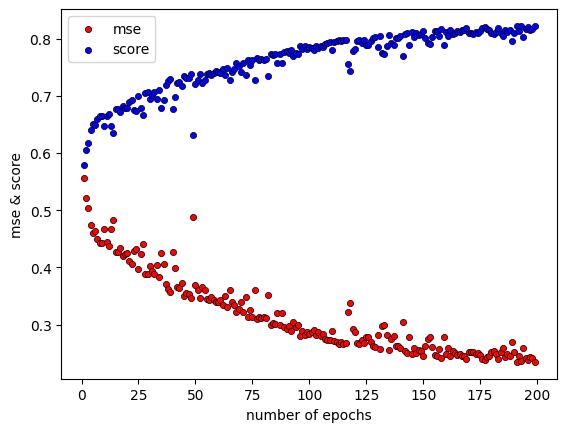

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

X, Y = fetch_california_housing(return_X_y=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
network = MLPRegressor(hidden_layer_sizes=(80, 80, 80, 80), max_iter=20000, activation='relu', solver='adam')

epochs = []
mse = []
score = []

for epoch in range(1, 200):
    network.partial_fit(X_train, Y_train)
    y_pred = network.predict(X_test)

    epochs.append(epoch)
    mse.append(mean_squared_error(Y_test, y_pred))
    score.append(network.score(X_test, Y_test))

plt.scatter(epochs, mse, label='mse', color='red', s=20, edgecolors='black', linewidths=0.5)
plt.scatter(epochs, score, label='score', color='blue', s=20, edgecolors='black', linewidths=0.5)
plt.xlabel("number of epochs")
plt.ylabel("mse & score")
plt.legend()
plt.show()

### Wnioski

Tak jak można się było spodziewać, wzrost wykonanych przez sieć epok skutkuje zmiejszaniem się MSE i wzrostem dokładności klasyfikacji. A więc im więcej epok, tym nasz model dokona dokładniejszej klasyfikacji.

## Zadanie 5.

Do dalszej analizy użyłam modelu takiego samego jak w zadaniu powyżej. Aby uzyskać dokładniejsze dane, dzieliłam dane wejściowe na zbiory trenujące i testowe zaczynając od proporcji 95:5 i zwiększając zbiór testowy aż do proporcji 5:95. Dla każdej zależności sprawdzałam wynik MSE i dokładności klasyfikacji, i wyniki te przedstawiłam na wykresie.

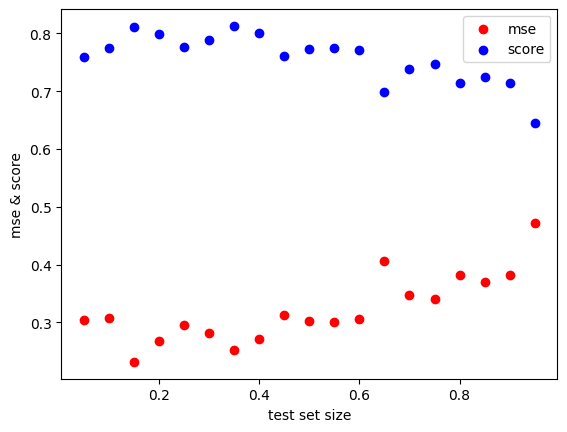

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

X, Y = fetch_california_housing(return_X_y=True)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

test_sizes = []
n = 0.05
for i in range(19):
    test_sizes.append(n)
    n += 0.05
mse = []
score = []

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
    network = MLPRegressor(hidden_layer_sizes=(80, 80, 80, 80), max_iter=20000, activation='relu', solver='adam')
    network.fit(X_train, Y_train)
    y_pred = network.predict(X_test)
    mse.append(mean_squared_error(Y_test, y_pred))
    score.append(network.score(X_test, Y_test))

plt.scatter(test_sizes, mse, label='mse', color='red')
plt.scatter(test_sizes, score, label='score', color='blue')
plt.legend()
plt.xlabel("test set size")
plt.ylabel("mse & score")
plt.show()

"""
Wnioski

Najbardziej optymalny wynik wyszedł dla proporcji wielkości zbioru trenującego do testującego mniej więcej 80:20 (lub 85:15). Zwiększanie zbioru testującego -
czyli zmniejszanie zbioru trenującego doprowadzało do gorszego wyniku MSE i score z powodu mniejszej dokładności wytrenowania modelu.
"""